In [10]:
import pandas as pd
import pickle
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [11]:
july = pd.read_pickle('../data/july.pkl')
july.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,22.0,Lyft
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,33.0,Lyft
2,2019-07-01 00:00:41.183,36.179319,-86.751538,Powered570380,76.0,Lyft
3,2019-07-01 00:00:41.620,36.152111,-86.803821,Powered240631,43.0,Lyft
4,2019-07-01 00:00:45.087,36.149355,-86.797550,Powered970404,52.0,Lyft


In [12]:
july_trip = pd.read_csv('../data/july_trip.csv')
july_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000


In [13]:
july.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    202
companyname      0
dtype: int64

#Null values only in chargelevel column. No nulls within the trip dfs

In [14]:
july.companyname.value_counts()

Jump      10367575
Bird       3702282
Lime       3233573
Lyft       2890233
Gotcha     1933513
Spin       1750581
Bolt       1188767
Name: companyname, dtype: int64

#Scooters pinging went up in July, especially for Jump which climbed from 3rd place up to 1st. 

In [15]:
july.pubdatetime.value_counts()

2019-07-30 09:08:43.000    1205
2019-07-31 09:59:13.000    1205
2019-07-28 02:31:43.000    1205
2019-07-31 08:09:13.000    1205
2019-07-31 07:09:13.000    1205
                           ... 
2019-07-10 21:05:58.537       1
2019-07-10 21:05:58.623       1
2019-07-10 21:05:58.630       1
2019-07-10 21:05:58.733       1
2019-07-16 06:07:02.173       1
Name: pubdatetime, Length: 2944872, dtype: int64

#Zipcodes df read in

In [16]:
zipcodes= gpd.read_file('../data/zipcodes.geojson')

In [17]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37203,33,NASHVILLE,93532.890729543782,120334624.37817383,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
4,37246,57,NASHVILLE,2247.4521491892065,315078.17651367187,"MULTIPOLYGON (((-86.79052 36.15846, -86.79107 ..."


In [18]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#Promise Zone df read in

In [19]:
promise_zone = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')

In [20]:
promise_zone.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6 non-null      int64   
 1   ZONE_ID     6 non-null      int64   
 2   SHAPE_STAr  6 non-null      float64 
 3   SHAPE_STLe  6 non-null      float64 
 4   geometry    6 non-null      geometry
dtypes: float64(2), geometry(1), int64(2)
memory usage: 368.0 bytes


In [21]:
promise_zone.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


<AxesSubplot:>

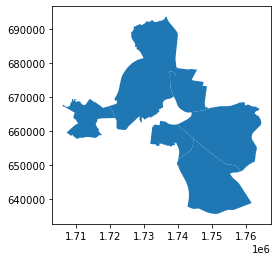

In [22]:
promise_zone.plot()

In [23]:
july['geometry'] = july.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)
july.head(3)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,22.0,Lyft,POINT (-86.809004 36.156678)
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,33.0,Lyft,POINT (-86.794138 36.145674)
2,2019-07-01 00:00:41.183,36.179319,-86.751538,Powered570380,76.0,Lyft,POINT (-86.751538 36.179319)


#Make a July geo df

In [24]:
july_geo = gpd.GeoDataFrame(july, 
                           crs = zipcodes.crs, 
                           geometry = july['geometry'])

In [25]:
type(july_geo)

geopandas.geodataframe.GeoDataFrame

In [26]:
zipcodes.head(1)

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."


In [27]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]
zipcodes.head(1)

,zip,po_name,geometry
0,37115,MADISON,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."


In [28]:
scooter_zip = gpd.sjoin(july_geo, zipcodes, op = 'within')

In [29]:
scooter_zip.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry,index_right,zip,po_name
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,22.0,Lyft,POINT (-86.80900 36.15668),1,37203,NASHVILLE
3,2019-07-01 00:00:41.620,36.152111,-86.803821,Powered240631,43.0,Lyft,POINT (-86.80382 36.15211),1,37203,NASHVILLE
4,2019-07-01 00:00:45.087,36.149355,-86.797550,Powered970404,52.0,Lyft,POINT (-86.79755 36.14935),1,37203,NASHVILLE
12,2019-07-01 00:00:57.200,36.156158,-86.776344,Powered608532,48.0,Lyft,POINT (-86.77634 36.15616),1,37203,NASHVILLE
15,2019-07-01 00:00:57.567,36.149963,-86.806727,Powered402686,64.0,Lyft,POINT (-86.80673 36.14996),1,37203,NASHVILLE


In [30]:
scooter_zip = scooter_zip[['pubdatetime', 'sumdid', 'chargelevel', 'companyname', 'geometry', 'zip', 'po_name']]
scooter_zip.head()

,pubdatetime,sumdid,chargelevel,companyname,geometry,zip,po_name
0,2019-07-01 00:00:33.550,Powered635135,22.0,Lyft,POINT (-86.80900 36.15668),37203,NASHVILLE
3,2019-07-01 00:00:41.620,Powered240631,43.0,Lyft,POINT (-86.80382 36.15211),37203,NASHVILLE
4,2019-07-01 00:00:45.087,Powered970404,52.0,Lyft,POINT (-86.79755 36.14935),37203,NASHVILLE
12,2019-07-01 00:00:57.200,Powered608532,48.0,Lyft,POINT (-86.77634 36.15616),37203,NASHVILLE
15,2019-07-01 00:00:57.567,Powered402686,64.0,Lyft,POINT (-86.80673 36.14996),37203,NASHVILLE


#place holder to make map with
stops_in_37207 = stops_by_zip.loc[stops_by_zip['zip'] == '37207']
stops_in_37207.shape